In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
# Read employees.csv
chatterbox = pd.read_csv("/content/employees.csv")
holidays = pd.read_csv("/content/holidays.csv")
leaves=pd.read_csv("/content/leaves.csv")
salary=pd.read_csv("/content/salary.csv")
chatterbox


,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [108]:
print(chatterbox.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee_No          997 non-null    int64 
 1   Employee_Code        997 non-null    int64 
 2   Name                 997 non-null    object
 3   Title                997 non-null    object
 4   Gender               997 non-null    object
 5   Religion_ID          997 non-null    int64 
 6   Marital_Status       930 non-null    object
 7   Designation_ID       997 non-null    int64 
 8   Date_Joined          997 non-null    object
 9   Date_Resigned        997 non-null    object
 10  Status               997 non-null    object
 11  Inactive_Date        997 non-null    object
 12  Reporting_emp_1      997 non-null    object
 13  Reporting_emp_2      997 non-null    object
 14  Employment_Category  997 non-null    object
 15  Employment_Type      997 non-null    object
 16  Religion

In [109]:
null_counts = chatterbox.isnull().sum()

# Filter columns with null values
columns_with_null = null_counts[null_counts > 0]

# Display columns with null values
print("Columns with null values:")
print(columns_with_null)


Columns with null values:
Marital_Status    67
dtype: int64


In [110]:
# Replace "'0000'" with NaN
chatterbox["Year_of_Birth"] = chatterbox["Year_of_Birth"].replace("'0000'", np.nan)

# Fill missing values with the median
median_year_of_birth = chatterbox["Year_of_Birth"].median()
chatterbox["Year_of_Birth"].fillna(median_year_of_birth, inplace=True)

In [111]:
# Fill missing values with mode by group
chatterbox["Marital_Status"] = chatterbox.groupby(["Gender", "Religion_ID"])["Marital_Status"].transform(
    lambda x: x.fillna(x.mode()[0])
)

In [112]:
chatterbox

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [113]:
chatterbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee_No          997 non-null    int64 
 1   Employee_Code        997 non-null    int64 
 2   Name                 997 non-null    object
 3   Title                997 non-null    object
 4   Gender               997 non-null    object
 5   Religion_ID          997 non-null    int64 
 6   Marital_Status       997 non-null    object
 7   Designation_ID       997 non-null    int64 
 8   Date_Joined          997 non-null    object
 9   Date_Resigned        997 non-null    object
 10  Status               997 non-null    object
 11  Inactive_Date        997 non-null    object
 12  Reporting_emp_1      997 non-null    object
 13  Reporting_emp_2      997 non-null    object
 14  Employment_Category  997 non-null    object
 15  Employment_Type      997 non-null    object
 16  Religion

In [114]:
null_counts = chatterbox.isnull().sum()

# Filter columns with null values
columns_with_null = null_counts[null_counts > 0]

# Display columns with null values
print("Columns with null values:")
print(columns_with_null)


Columns with null values:
Series([], dtype: int64)


In [115]:
import pandas as pd

# Split the 'Date_Resigned' column into month, day, and year
chatterbox[['Month', 'Day', 'Year']] = chatterbox['Date_Resigned'].str.split('/', expand=True)

# Extract the year as integers
chatterbox['Resigned_Year'] = pd.to_numeric(chatterbox['Year'], errors='coerce')

# Drop the temporary columns (Month, Day, Year) if needed
# chatterbox = chatterbox.drop(['Month', 'Day', 'Year'], axis=1)

In [116]:
chatterbox

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Month,Day,Year,Resigned_Year
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,...,\N,Staff,Permanant,Buddhist,Driver,1965,\N,None,None,NaN
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,...,\N,Staff,Permanant,Buddhist,Driver,1973,\N,None,None,NaN
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,...,\N,Staff,Permanant,Buddhist,Account Clerk,1974,6,28,2021,2021.0
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,...,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,1,31,2022,2022.0
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,...,\N,Staff,Permanant,Buddhist,Store Keeper,1980,\N,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,...,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,12,22,2022,2022.0
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,...,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0000-00-00,None,None,NaN
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,...,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,\N,None,None,NaN
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,...,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0000-00-00,None,None,NaN


In [117]:
# Convert the "Resigned_Year" column to string
chatterbox['Resigned_Year'] = chatterbox['Resigned_Year'].astype(str)

# Remove the ".0" part from the string values
chatterbox['Resigned_Year'] = chatterbox['Resigned_Year'].str.replace('.0', '')

# Handle missing values and add "20" in front of values
chatterbox.loc[chatterbox['Resigned_Year'].str.strip() != '', 'Resigned_Year'] = '20' + chatterbox['Resigned_Year']

# Replace remaining empty string values with 'Unknown'
chatterbox['Resigned_Year'].replace('', 'Unknown', inplace=True)


<ipython-input-117-635fd6d7f673>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  chatterbox['Resigned_Year'] = chatterbox['Resigned_Year'].str.replace('.0', '')


In [118]:
chatterbox

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Month,Day,Year,Resigned_Year
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,...,\N,Staff,Permanant,Buddhist,Driver,1965,\N,None,None,20nan
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,...,\N,Staff,Permanant,Buddhist,Driver,1973,\N,None,None,20nan
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,...,\N,Staff,Permanant,Buddhist,Account Clerk,1974,6,28,2021,2021
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,...,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,1,31,2022,2022
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,...,\N,Staff,Permanant,Buddhist,Store Keeper,1980,\N,None,None,20nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,...,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993,12,22,2022,2022
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,...,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994,0000-00-00,None,None,20nan
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,...,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997,\N,None,None,20nan
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,...,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990,0000-00-00,None,None,20nan


In [119]:
# Filter rows with "20nan" values
chatterbox1 = chatterbox[chatterbox['Resigned_Year'] != '20nan'].copy()

chatterbox1

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth,Month,Day,Year,Resigned_Year
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,...,\N,Staff,Permanant,Buddhist,Account Clerk,1974,6,28,2021,2021
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,...,\N,Staff,Permanant,Catholic,Purchasing Officer,1974,1,31,2022,2022
9,359,529,Sydney Oberbrunner,Mr,Male,1,Married,41,7/1/2006,1/31/2022,...,\N,Staff,Permanant,Buddhist,Electrician,1967,1,31,2022,2022
10,360,573,Angeline Yundt,Mr,Male,1,Married,42,8/29/2006,5/5/2021,...,\N,Management,Permanant,Buddhist,Transport Officer,1976,5,5,2021,2021
12,363,691,Leonel Romaguera,Mr,Male,1,Married,24,5/25/2007,5/23/2021,...,\N,Staff,Permanant,Buddhist,Driver,1975,5,23,2021,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2600,51034,Prof Trevor Ledner,Mr,Male,1,Married,56,4/26/2022,5/4/2022,...,\N,Labour,Contarct Basis,Buddhist,Helper,1986,5,4,2022,2022
971,2601,5416,Miss Alene Stokes DVM,Mr,Male,1,Married,90,4/28/2022,8/27/2022,...,\N,Staff,Contarct Basis,Buddhist,Assistant manager - HR,1987,8,27,2022,2022
974,2604,5418,Price Zieme,Mr,Male,1,Married,78,5/3/2022,9/19/2022,...,\N,Staff,Contarct Basis,Buddhist,Assistant Accountant,1989,9,19,2022,2022
982,2642,5420,Mireya Crooks,Mr,Male,1,Married,104,7/14/2022,11/4/2022,...,\N,Management,Contarct Basis,Buddhist,Accountant,1965,11,4,2022,2022


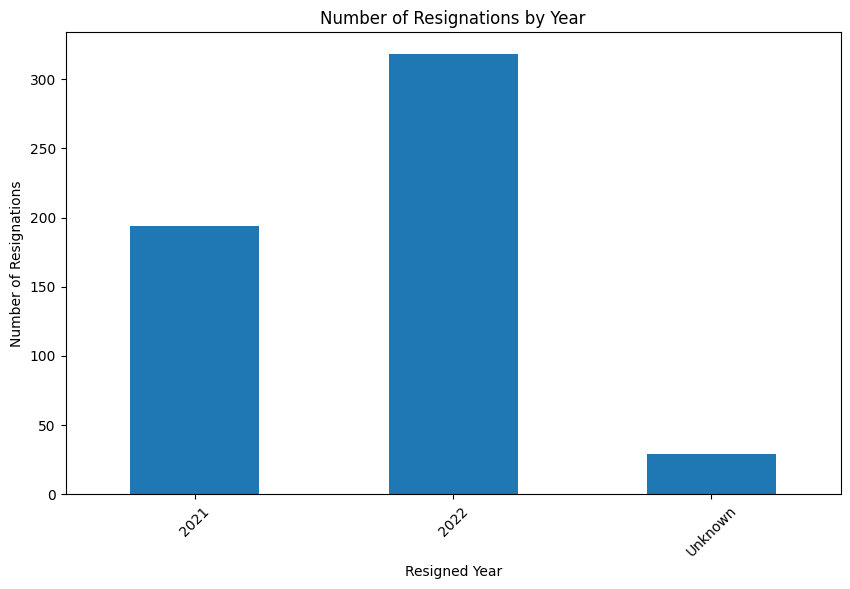

In [120]:
import pandas as pd
import matplotlib.pyplot as plt


# Count the number of resignations for each year
resignations_by_year = chatterbox1['Resigned_Year'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
resignations_by_year.plot(kind='bar')
plt.xlabel('Resigned Year')
plt.ylabel('Number of Resignations')
plt.title('Number of Resignations by Year')
plt.xticks(rotation=45)
plt.show()


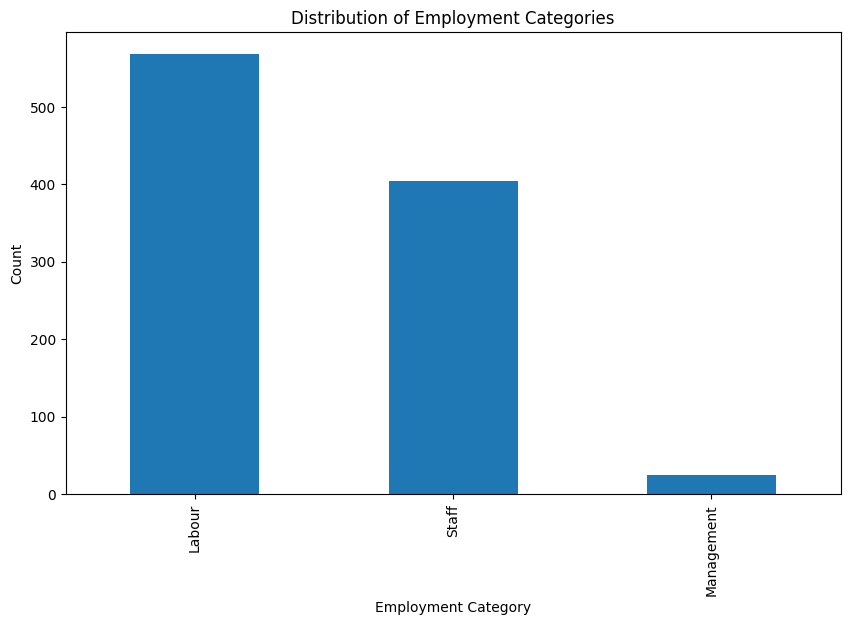

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of occurrences for each employment category
employment_counts = chatterbox['Employment_Category'].value_counts()

# Plot the bar graph
employment_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Employment Category')
plt.ylabel('Count')
plt.title('Distribution of Employment Categories')
plt.show()


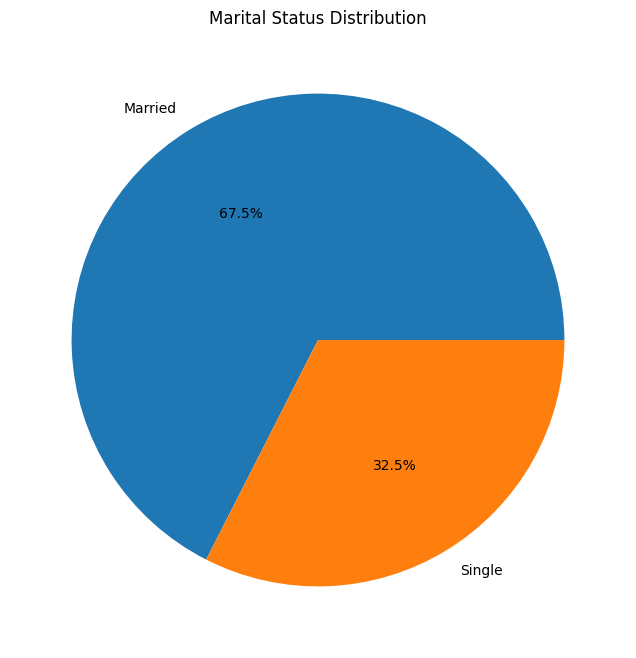

In [122]:
# Count the occurrences of each marital status
marital_status_counts = chatterbox['Marital_Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.show()


In [123]:
marital_status_counts = chatterbox1['Marital_Status'].value_counts()

# Print the counts
print(marital_status_counts)

Married    379
Single     162
Name: Marital_Status, dtype: int64


In [124]:
# Split the 'Date_Joined' column into month, day, and year
chatterbox[['Month_Joined', 'Day_Joined', 'Year_Joined']] = chatterbox['Date_Joined'].str.split('/', expand=True)

# Convert the 'Year_Joined' column to integer
chatterbox['Year_Joined'] = chatterbox['Year_Joined'].astype(int)

chatterbox

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,...,Religion,Designation,Year_of_Birth,Month,Day,Year,Resigned_Year,Month_Joined,Day_Joined,Year_Joined
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,...,Buddhist,Driver,1965,\N,None,None,20nan,12,8,1993
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,...,Buddhist,Driver,1973,\N,None,None,20nan,3,14,1995
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,...,Buddhist,Account Clerk,1974,6,28,2021,2021,1,27,1988
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,...,Catholic,Purchasing Officer,1974,1,31,2022,2022,10,1,1999
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,...,Buddhist,Store Keeper,1980,\N,None,None,20nan,1,26,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,...,Buddhist,Account Executive,1993,12,22,2022,2022,11,1,2022
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,...,Buddhist,Quantity Surveyor,1994,0000-00-00,None,None,20nan,11,21,2022
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,...,Buddhist,Software Developer,1997,\N,None,None,20nan,12,5,2022
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,...,Buddhist,Quantity Surveyor,1990,0000-00-00,None,None,20nan,12,8,2022


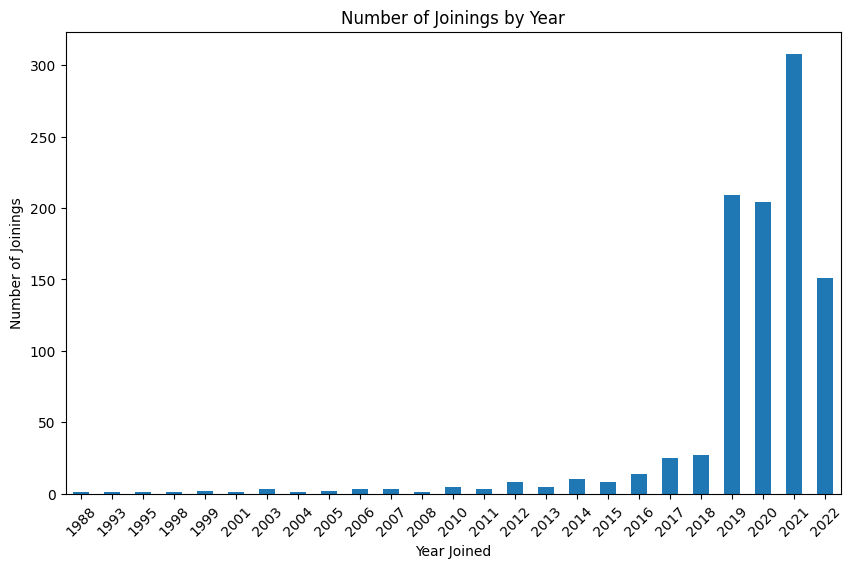

In [125]:
# Count the number of joinings for each year
joinings_by_year = chatterbox['Year_Joined'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
joinings_by_year.plot(kind='bar')
plt.xlabel('Year Joined')
plt.ylabel('Number of Joinings')
plt.title('Number of Joinings by Year')
plt.xticks(rotation=45)
plt.show()


In [126]:
year_joined_counts = chatterbox['Year_Joined'].value_counts()

# Print the counts
print(year_joined_counts)

2021    308
2019    209
2020    204
2022    151
2018     27
2017     25
2016     14
2014     10
2012      8
2015      8
2013      5
2010      5
2011      3
2007      3
2006      3
2003      3
2005      2
1999      2
1995      1
2008      1
2004      1
2001      1
1988      1
1998      1
1993      1
Name: Year_Joined, dtype: int64


In [127]:
year_joined_counts = chatterbox['Status'].value_counts()

# Print the counts
print(year_joined_counts)

Inactive    764
Active      233
Name: Status, dtype: int64


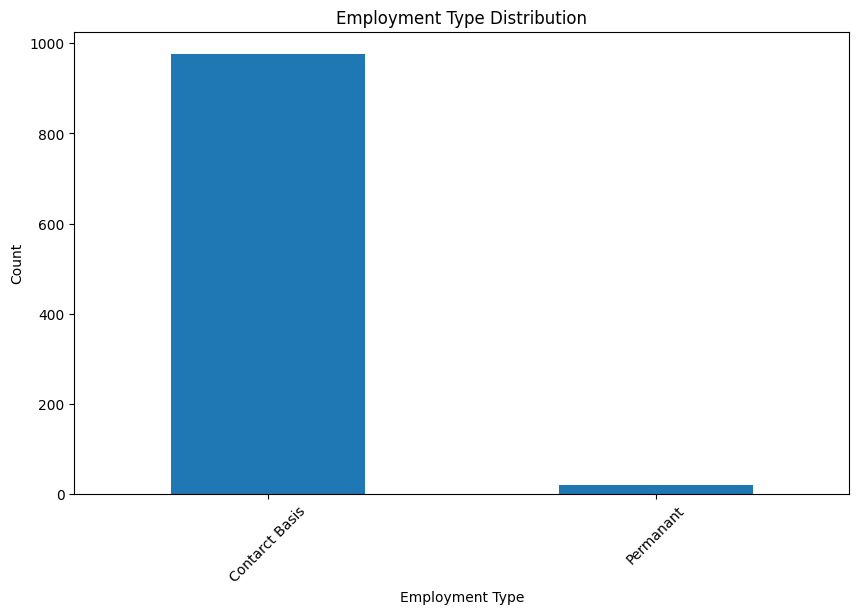

In [128]:
# Count the occurrences of each employment type
employment_type_counts = chatterbox['Employment_Type'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
employment_type_counts.plot(kind='bar')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.title('Employment Type Distribution')
plt.xticks(rotation=45)
plt.show()


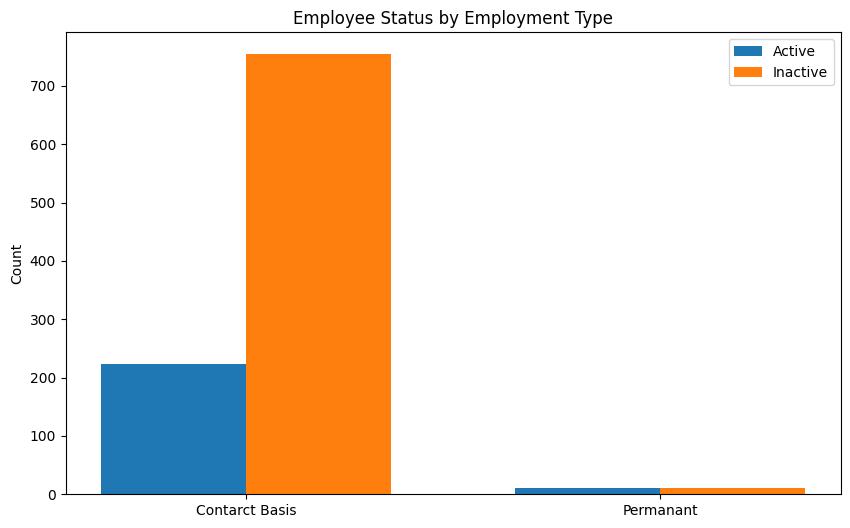

In [129]:
# Group the data by 'Status' and 'Employment_Type' and count the occurrences
grouped_counts = chatterbox.groupby(['Status', 'Employment_Type']).size().unstack()

# Plot the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

# Set the bar width
bar_width = 0.35

# Get the index positions for the bars
bar_positions = range(len(grouped_counts.index))

# Plot the bars for 'Active' employees
active_bars = ax.bar(bar_positions, grouped_counts.loc['Active'], width=bar_width, label='Active')

# Plot the bars for 'Inactive' employees
inactive_bars = ax.bar([p + bar_width for p in bar_positions], grouped_counts.loc['Inactive'], width=bar_width, label='Inactive')

# Set the x-axis tick labels
ax.set_xticks([p + bar_width/2 for p in bar_positions])
ax.set_xticklabels(grouped_counts.columns)

# Set the y-axis label
ax.set_ylabel('Count')

# Set the chart title
ax.set_title('Employee Status by Employment Type')

# Add a legend
ax.legend()

# Display the plot
plt.show()


In [130]:
# Save the preprocessed DataFrame to a CSV file
chatterbox.to_csv("employee_preprocess_200623P.csv", index=False)